<h1>NASA NET <h1>

Epoch 1/50


C:\Users\ramav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.5432 - loss: 1.4794 - val_accuracy: 0.7390 - val_loss: 0.7134
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.7816 - loss: 0.6110 - val_accuracy: 0.7880 - val_loss: 0.5373
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8102 - loss: 0.5136 - val_accuracy: 0.8550 - val_loss: 0.4028
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8186 - loss: 0.5128 - val_accuracy: 0.8540 - val_loss: 0.4133
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8431 - loss: 0.4321 - val_accuracy: 0.8670 - val_loss: 0.3673
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8654 - loss: 0.3898 - val_accuracy: 0.8810 - val_loss: 0.3559
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8731 - loss: 0.3421 - val_accuracy: 0.8700 - val_loss: 0.3635
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8781 - loss: 0.3548 - val_accuracy: 0.869

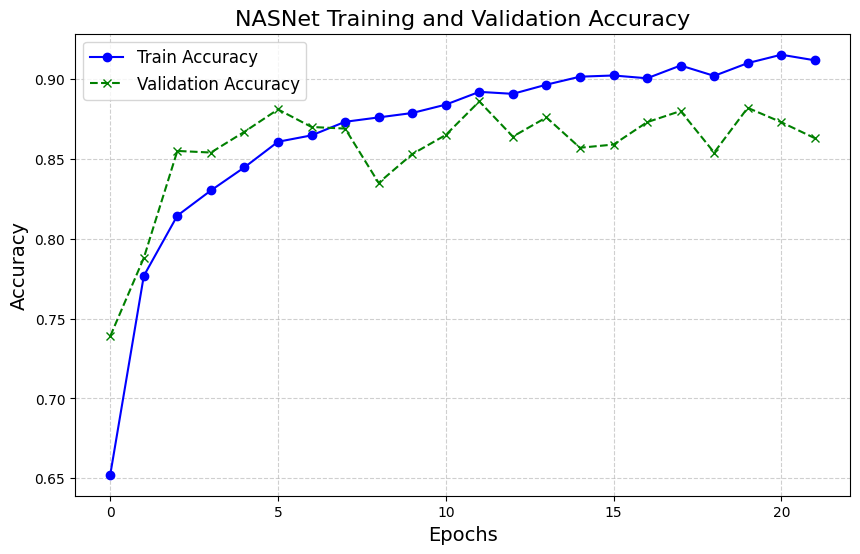

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
NASNet Classification Report:
              precision    recall  f1-score   support

      Broken       0.86      0.86      0.86       201
    Immature       0.92      0.89      0.90       225
      Intact       0.88      0.92      0.90       241
Skin-Damaged       0.88      0.90      0.89       226
     Spotted       0.90      0.83      0.86       107

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load extracted DenseNet features
densenet_train_features, train_labels, densenet_test_features, test_labels = joblib.load('densenet_features.joblib')

# NASNet-based Model Architecture
nasnet_classifier = Sequential([
    Dense(1024, activation='relu', input_shape=(1024,)),  # Input shape matches DenseNet feature size
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Number of output classes
])

nasnet_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and model saving
nasnet_checkpoint = ModelCheckpoint('nasnet.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# Train the NASNet model using DenseNet features
nasnet_history = nasnet_classifier.fit(
    densenet_train_features, train_labels,
    epochs=50,
    validation_data=(densenet_test_features, test_labels),
    callbacks=[nasnet_checkpoint, early_stop]
)

# Plotting accuracy graphs for NASNet with different colors
plt.figure(figsize=(10, 6))  # Increase figure size for better clarity
plt.plot(nasnet_history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(nasnet_history.history['val_accuracy'], label='Validation Accuracy', color='green', linestyle='--', marker='x')
plt.title('NASNet Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.show()


# Classification Report for NASNet
nasnet_predictions = nasnet_classifier.predict(densenet_test_features)
nasnet_pred_labels = nasnet_predictions.argmax(axis=1)
print("NASNet Classification Report:")
print(classification_report(test_labels.argmax(axis=1), nasnet_pred_labels, target_names=['Broken', 'Immature', 'Intact', 'Skin-Damaged', 'Spotted']))

<Figure size 1200x1000 with 0 Axes>

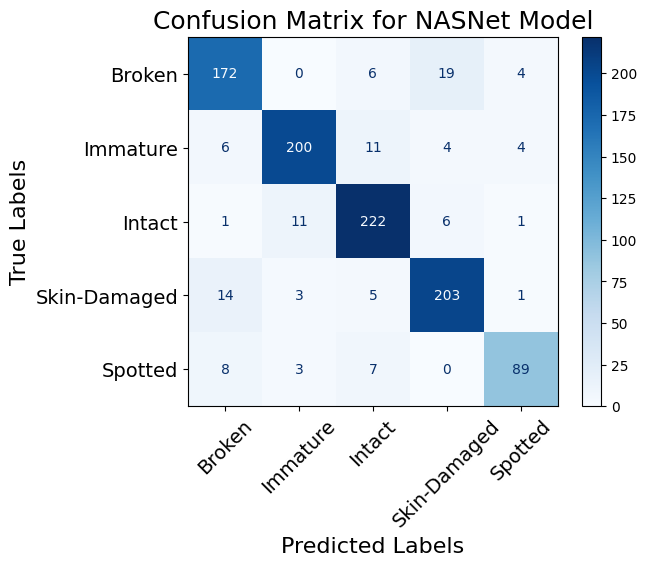

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
nasnet_confusion_matrix = confusion_matrix(test_labels.argmax(axis=1), nasnet_pred_labels)

# Create a confusion matrix display
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=nasnet_confusion_matrix,
    display_labels=['Broken', 'Immature', 'Intact', 'Skin-Damaged', 'Spotted']
)

# Plot the confusion matrix with adjusted figure size and font size
plt.figure(figsize=(12, 10))  # Increase figure size
cm_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for NASNet Model", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=16)
plt.ylabel("True Labels", fontsize=16)
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels to avoid overlap
plt.yticks(fontsize=14)
plt.show()
